<a href="https://colab.research.google.com/github/parwinderau/machinelearning/blob/main/binaryclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting the number of distressed O-rings for space shuttles

Please keep in mind that the number of data samples is very low for this example.

In [110]:
# Case scenario:
# On January 28, 1986, a routine launch was anticipated for the Challenger space shuttle. 
# Seventy-three seconds into the flight, disaster happened: the shuttle broke apart, killing all 
# seven crew members on board. An investigation into the cause of the disaster focused on a critical # seal called an O-ring, and it is believed that damage to these O-rings during a shuttle launch may # be related to the ambient temperature during the launch. The table below summarizes observational # data on O-rings for 23 shuttle missions, where the mission order is based on the temperature at
# the time of the launch.
#
# The goal is to predict the number of O-rings that will experience thermal distress for a given 
# flight when the launch temperature is below freezing.

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# function definition to save the figure
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    file = fig_id + "." + fig_extension
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(file, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [111]:
# import pandas to import the dataset
import pandas as pd
# import the dataset

def load_o_ring_data():
    # a way to save the name of the file as a string
    csv_file =  'iris.data'
    # The separator in this dataset is given by a space instad of ','
    data = pd.read_csv(
                        csv_file, sep = ','
                        #header=none
                       ); 
    df = pd.DataFrame(data)
    return df

In [112]:
# call of function to load the dataset and display it
o_ring = load_o_ring_data(); o_ring.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [113]:
# we can also observe some information about the data
o_ring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [114]:
# we count the number of time the values in O_rings_thermal_distress are repeated
o_ring["class"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [115]:
# This is in case you want to show also some statistics of the data 
o_ring.describe()
o_ring.replace({'Iris-setosa':0, 'Iris-virginica':0,'Iris-versicolor':1 }, inplace=True)

Saving figure histograms


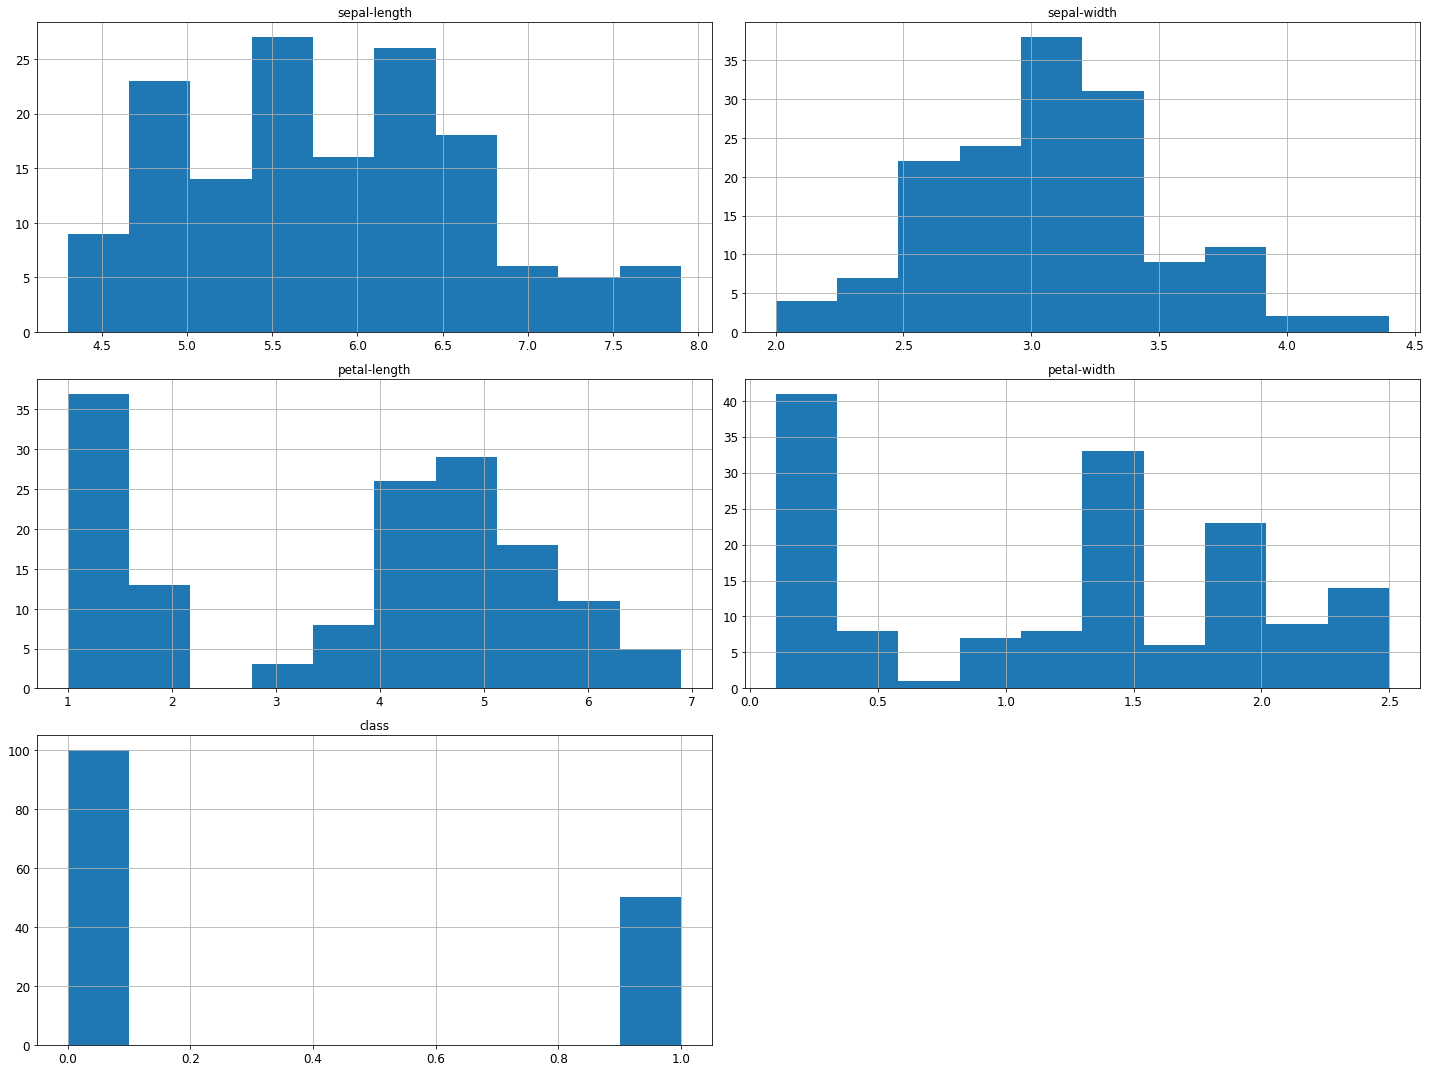

In [116]:
# We want to dsiplay the values of the dataset
# Display the plots in line
%matplotlib inline
import matplotlib.pyplot as plt
o_ring.hist(bins=10, figsize=(20,15))
save_fig('histograms')
plt.show()

In [117]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [120]:
from sklearn.model_selection import train_test_split
# split the data into training and test set.
#Put labelling


train_set, test_set = train_test_split(o_ring, test_size=0.2, random_state=42)

In [121]:
test_set.head()

,sepal-length,sepal-width,petal-length,petal-width,class
73,6.1,2.8,4.7,1.2,1
18,5.7,3.8,1.7,0.3,0
118,7.7,2.6,6.9,2.3,0
78,6.0,2.9,4.5,1.5,1
76,6.8,2.8,4.8,1.4,1


In [122]:
# To "filter" the dataset and create the one needed for the training
# drop the labels for training set to create the input training set
o_ring = train_set.drop("class", axis=1) 
#o_ring = o_ring.drop("Nr_of_Flight", axis=1)
# The label for the training is characterised by the column with the
# "O_rings_thermal_distress"
o_ring_labels = train_set["class"].copy()

In [123]:
#train_set.head()
o_ring.head()

,sepal-length,sepal-width,petal-length,petal-width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


In [124]:
o_ring.head()

,sepal-length,sepal-width,petal-length,petal-width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


In [125]:
o_ring_labels.head()

22    0
15    0
65    1
11    0
42    0
Name: class, dtype: int64

In [136]:
# To prepare the data it is possible to use a Pipeline
# I leave to you to look into the information about Pipelines and Transformers.
# Here some suggestions: https://www.databricks.com/glossary/what-are-ml-pipelines
# http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html 

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])
print(num_pipeline)

Pipeline(steps=[('std_scaler', StandardScaler())])


In [127]:
from sklearn.compose import ColumnTransformer

In [137]:

num_attribs = list(o_ring)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
    ])

o_ring_prepared = full_pipeline.fit_transform(o_ring)

In [129]:
o_ring_prepared

array([[-1.47393679,  1.22037928, -1.5639872 , -1.30948358],
       [-0.13307079,  3.02001693, -1.27728011, -1.04292204],
       [ 1.08589829,  0.09560575,  0.38562104,  0.28988568],
       [-1.23014297,  0.77046987, -1.21993869, -1.30948358],
       [-1.7177306 ,  0.32056046, -1.39196294, -1.30948358],
       [ 0.59831066, -1.25412249,  0.72966956,  0.95628954],
       [ 0.72020757,  0.32056046,  0.44296246,  0.42316645],
       [-0.74255534,  0.99542457, -1.27728011, -1.30948358],
       [-0.98634915,  1.22037928, -1.33462153, -1.30948358],
       [-0.74255534,  2.34515281, -1.27728011, -1.44276436],
       [-0.01117388, -0.80421307,  0.78701097,  0.95628954],
       [ 0.23261993,  0.77046987,  0.44296246,  0.55644722],
       [ 1.08589829,  0.09560575,  0.5576453 ,  0.42316645],
       [-0.49876152,  1.8952434 , -1.39196294, -1.04292204],
       [-0.49876152,  1.44533399, -1.27728011, -1.30948358],
       [-0.37686461, -1.47907719, -0.01576889, -0.24323741],
       [ 0.59831066, -0.

In [138]:
# Here diverse types of regressive models are used: Support Vector Machines, Random Forests 
# and Linear Regressors

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(o_ring_prepared, o_ring_labels)

#reg = RandomForestRegressor(n_estimators=10, random_state=42)
#reg = SVR(kernel="linear")
#reg = LinearRegression()

# The fit function trains the regressor (the model)

#reg.fit(o_ring_prepared, o_ring_labels)

SGDClassifier(random_state=42)

In [152]:

some_data = o_ring.iloc[:10]
some_labels = o_ring_labels.iloc[:10]
# Part of the dataset (not used for training) is used to build for the prediction
some_data_prepared = full_pipeline.transform(some_data)
# sgd_clf.predict([some_digit])
prediction=sgd_clf.predict(some_data_prepared)
# print("Predictions:", sgd_clf.predict([some_data_prepared]))

In [154]:
from sklearn import metrics
#print("Labels:", list(some_labels))
y_test=list(some_labels)

print ("The accuracy socre is:", metrics.accuracy_score(prediction,y_test))
# print('The accuracy of the Decision Tree is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy socre is: 0.9


In [141]:
from sklearn.metrics import mean_squared_error
# some metrics used to evaluate the error in the prediction
o_ring_predictions = sgd_clf.predict(o_ring_prepared)
mse = mean_squared_error(o_ring_labels, o_ring_predictions)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 0.5244044240850758


In [142]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(o_ring_labels, o_ring_predictions)
print("MAE:", mae)

MAE: 0.275


# Cross validation on the training set - a better way of validation

In [143]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
from sklearn.model_selection import cross_val_score
# cross_val_score is a way to use the cross-validation in sklearn.
# cross validation https://scikit-learn.org/stable/modules/cross_validation.html
cross_validation_scores = cross_val_score(sgd_clf, o_ring_prepared, o_ring_labels,
                                          scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-cross_validation_scores)
display_scores(rmse_scores)

Scores: [0.70710678 0.57735027 0.5        0.5        0.57735027 0.76376262
 0.40824829 0.57735027 0.70710678 0.76376262]
Mean: 0.6082037892057782
Standard deviation: 0.11585112916612704


## Accuracy Calculation


In [148]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, o_ring_prepared, o_ring_labels, cv=8, scoring="accuracy")


array([0.73333333, 0.6       , 0.73333333, 0.6       , 0.73333333,
       0.6       , 0.66666667, 0.6       ])